# The Perceptron algorithm, Part 2

In this part 2 of the assignment, you will implement the following:

1. The Kernel Perceptron training and evaluation procedures.

2. Implement the quadratic kernel.

3. Show empirically that the Kernel Perceptron converges on the XOR dataset.

4. Bonus points.

## Write Your Name Here: Jay Yadav


# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version *perceptron.pdf* showing the code and the output of all cells, and save it in the same folder that contains the notebook file *perceptron.ipynb*.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas.

In [1]:
import numpy as np
import utils

np.random.seed(1)

## 1. The Perceptron algorithm (from Part 1)

Copy here from Part 1 the implementation of the training procedure for the Perceptron algorithm.

The training algorithm runs for the specified number of epochs or until convergence, whichever happens first. The algorithm converged when it makes no mistake on the training examples. If the algorithm converged, display a message "Converged in \<e\> epochs!'.

In [2]:
def train(X, y, E, w_vectors):
    """Perceptron training function.
    Args:
        X (np.ndarray): A 2D array training instances, one per row.
        y (np.ndarray): A vector of labels.
        E (int): the maximum number of epochs.
        
    Returns:
        np.ndarray: The learned vector of weights / parameters.
    """
    # Add bias feature to X.
   # X = np.column_stack((np.ones(len(X)), X))
    
    # Initialize w wtih zero's.
    w = np.zeros(X.shape[1])
    
    counter = 0
    e = 0
    while (e < E and counter != len(X)):
        counter = 0
        for i in range(len(X)):
            h = w @ X[i]
            if h * y[i] <= 0:
                w = w + y[i]*X[i]
            else:
                counter+=1
        w_vectors.append(w)
        e+=1
    if counter == len(X):
        print('Converged in ', e, ' epochs!')
    return w

Implement the Perceptron prediction function that takes as input the Perceptron parameters w and returns a vector with the labels (+1 or -1) predicted for the test examples in input data.

In [3]:
def perceptron_test(X, w):
    """Perceptron prediction function.
    Args:
        X (np.ndarray): A 2D array training instances, one per row.
        w (np.ndarray): A vector of parameters.

        
    Returns:
        np.ndarray: The vector of predicted labels.
    """
    # Add bias feature to X.
    X = np.column_stack((np.ones(len(X)), X))
    
    # Compute the perceptron predictions on the examples in X. 
    pred = X@w

    for i in range(len(pred)):
        if pred[i] > 0:
            pred[i] = 1
        else:
            pred[i] = -1
        
    return pred

## 2. The Kernel Perceptron

Implement the training procedure for the Kernel Perceptron algorithm.

The algorithm runs for the specified number of epochs or until convergence, whichever happens first. The algorithm converged when it makes no mistake on the training examples. If the algorithm converged, display a message "Converged in \<e\> epochs!'.

Return the learned vector of dual parameters alpha.

In [4]:
def kperceptron_train(X, y, E, K):
    """Kernel Perceptron training function.
    Args:
        X (np.ndarray): A 2D array training instances, one per row.
        y (np.ndarray): A vector of labels.
        E (int): the maximum number of epochs.
        K (function): the kernel function.
        
    Returns:
        np.ndarray: The learned vector of dual parameters.
    """
    
    # Initialize dual parameters alpha with zero's.
    alpha = np.zeros(len(X))
    
    
    counter = 0
    e = 0
    while (e < E and counter != len(X)):
        counter = 0
        for k in range(len(X)):
            sum1 = 0
            for n in range(len(X)):
                sum1 += alpha[n] * y[n] * (K(X[n], X[k]))
            sign = np.sign(sum1)
            if (sign != y[k]):
                alpha[k] += 1
            else:
                counter+=1
        e+=1
    if counter == len(X):
        print('Converged in ', e, ' epochs!')   
    return alpha

Write a function that takes as input the set of training examples, their labels, and the trained dual parameters, and return a tuple containing:

1. the support vectors;

2. their labels;

3. their dual parameters. 

Remember, support vectors are training examples for which the corresponding dual parameter alpha is non-zero.

In [5]:
def support_vectors(X, y, alpha):
    """Select support vectors.
    Args:
        X (np.ndarray): A 2D array training instances, one per row.
        y (np.ndarray): A vector of labels.
        alpha (np.ndarray): The vector of dual parameters.
        
    Returns:
        X_s, y_s, alpha_s: The support vectors, their labels, and their dual parameters.
    """
    
    
            
    
    X_s = X[alpha != 0]
            
    y_s = np.array([])
    
    for j in range(len(y)):
        if (alpha[j] != 0):
            y_s=np.append(y_s, y[j])
    
    
    alpha_s = np.array([])
    
    for k in range(len(alpha)):
        if (alpha[k] != 0):
            alpha_s=np.append(alpha_s, alpha[k])
    
    return (X_s, y_s, alpha_s)

Implement the Kernel Perceptron prediction function that takes as input the Kernel Perceptron dual parameters alpha, support vectors, their labels, and the kernel, and returns a vector with the labels (+1 or -1) predicted for the test examples.

In [6]:
def kperceptron_test(X_s, y_s, alpha_s, K, X):
    """Kernel Perceptron prediction function.
    Args:
        X_s (np.ndarray): A 2D array of support vectors, one per row.
        y_s (np.ndarray): The vector of labels corresponding to the support vectors.
        alpha_S (np.ndarray): The vector of dual parameters for the support vectors.
        K (function): the kernel function.

        X (np.ndarray): A 2D array of test instances, one per row.
        
    Returns:
        np.ndarray: The vector of predicted labels for the test instances.
    """
    
    # Compute the kernel perceptron predictions on the examples in X. 
    # YOUR CODE HERE
    pred = np.zeros(len(X))
    
    for k in range(len(X)):
        sum1 = 0
        for n in range(len(X_s)):
            sum1 += alpha_s[n] * y_s[n] * (K(X_s[n], X[k]))
        if sum1 <= 0:
            pred[k] = -1
        else:
            pred[k] = 1
        
    return pred

Here is my implementation of the linear kernel $K(x,y) = 1 + x^T y$

In [7]:
def linear_kernel(x, y):
    return 1 + x @ y

Implement the quadratic kernel $K(x, y) = (1 + x^T y)^2$.

In [8]:
def quadratic_kernel(x, y):
    # YOUR CODE HERE
    result = (1 + x@y)**2
    return result

## 3.  Let's experiment with the XOR dataset and the two perceptron algorithms.

In [9]:
# Create a more complex XOR dataset, with N points clustered around each of the 4 'corners'
def xor_dataset(N):
    """Generate XOR dataset.
    Args:
        N: number of points per example cluster.
        
    Returns:
        X: A 2D array with examples, one per line.
        y: A vector of labels.
    """
    X00 = (0, 0) + (np.random.sample((N, 2)) - 0.5) / 4
    y00 = np.full((N,), -1)
    X01 = (0, 1) + (np.random.sample((N, 2)) - 0.5) / 4
    y01 = np.full((N,), +1)
    X10 = (1, 0) + (np.random.sample((N, 2)) - 0.5) / 4
    y10 = np.full((N,), +1)
    X11 = (1, 1) + (np.random.sample((N, 2)) - 0.5) / 4
    y11 = np.full((N,), -1)
    
    X = np.row_stack((X00, X01, X10, X11))
    y = np.concatenate((y00, y01, y10, y11))
    
    return X, y

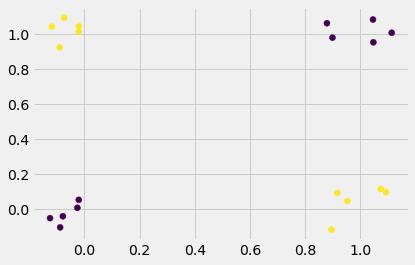

In [10]:
X, y = xor_dataset(5)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X[:,0], X[:,1], c = y)

Let's train the Kernel Perceptron algorithm with the quadratic kernel for up to 50 epochs and evaluate its accuracy on a new set of test examples.

In [11]:
# Train the kernel perceptron
E = 50
alpha = kperceptron_train(X, y, E, quadratic_kernel)
print('alpha =', alpha)

# Find the support vectors.
X_s, y_s, alpha_s = support_vectors(X, y, alpha)
print('Found', alpha_s.size, 'support vectors out of', alpha.size, 'training examples.')

# Test the kernel perceptron on a new set of test examples.
X_test, y_test = xor_dataset(2)
predictions = kperceptron_test(X_s, y_s, alpha_s, quadratic_kernel, X_test)

Converged in  7  epochs!
alpha = [4. 0. 1. 0. 0. 4. 0. 0. 0. 0. 3. 0. 0. 1. 0. 4. 0. 0. 0. 0.]
Found 6 support vectors out of 20 training examples.


Write code to compute the accuracy of the Kernel Perceptron on the test examples.

In [12]:
# YOUR CODE HERE
count = 0
for i in range(len(predictions)):
    if (predictions[i] == y_test[i]):
        count += 1

accuracy = (count/len(y_test))
print('Accuracy on test examples is:', accuracy)

Accuracy on test examples is: 0.875


## 4. Bonus points

A. Here, train the Perceptron algorithm on the XOR dataset, using the feature space corresponding to the quadratic kernel.

B. Empirically show that the trained weight vector is equal with the weighted sum of the support vectors (slide 39) that were trained by the Kernel Perceptron on the same dataset.

In [13]:
def project_features(X):
    # Project the examples in X, which contain only 2 features x and y, into the feature space
    #     corresponding to the quadratic kernel shown on slide 45, i.e. from 2 to 6 features.
    # Return the array of the new examples, each containing 6 features.
    feature_1 = np.ones(len(X))
    feature_2 = (np.sqrt(2)) * X[:, 0]
    feature_3 = (np.sqrt(2)) * X[:, 1]
    feature_4 = (X[:, 0])**2
    feature_5 = (np.sqrt(2)) * X[:, 0] * X[:, 1]
    feature_6 = (X[:, 1])**2
    kernel = np.column_stack((feature_1, feature_2, feature_3, feature_4, feature_5, feature_6))
    
    return kernel
    

In [14]:
# Train the perceptron on the projected version of the XOR dataset, using the 6 features.
Xnew = project_features(X)
E = 50
w_vect =[]
w = train(Xnew, y, E, w_vect)
print(w)

Converged in  7  epochs!
[-1.          0.86826516  0.53975244  1.02644682 -4.72634945  0.56711418]


In [15]:
# Compute the weighted sum of the support vectors (slide 39) using X_s, y_s, alpha_s.
alpha = kperceptron_train(X, y, E, quadratic_kernel)

X_s, y_s, alpha_s = support_vectors(Xnew, y, alpha)
wt = np.zeros(len(X_s))

j = 0
while j<len(X_s):
    wt = wt + X_s[j] * alpha_s[j] * y_s[j]
    j += 1
    
    

    


# Compare with w printed above. They should be the same.
print(wt)

Converged in  7  epochs!
[-1.          0.86826516  0.53975244  1.02644682 -4.72634945  0.56711418]


## 5. Anything extra goes here.